In [ ]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from module_for_preprocessing_metrics import *  
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

with open('../config.yml', 'r') as file:
    config = yaml.safe_load(file)

size = config['données']['image']['size']



In [ ]:
testing = os.path.join(os.path.abspath(os.path.join(os.getcwd(), "..")), "data", "Testing")

x_test, y_test = load_images_with_preprocessing(testing, size)

In [38]:
base_dir = os.getcwd()
save_dir = os.path.join(base_dir,'..', 'src', 'models', 'sauvegardes_modeles')  # Remonter d'un niveau, aller dans 'src/models'
model_to_load = 'modele_brain_tumor_20241117_205951.h5'  # Remplace par le nom exact de ton modèle
model_path = os.path.join(save_dir, model_to_load)

model = load_model(model_path)

13/13 [==============================] - 36s 3s/step


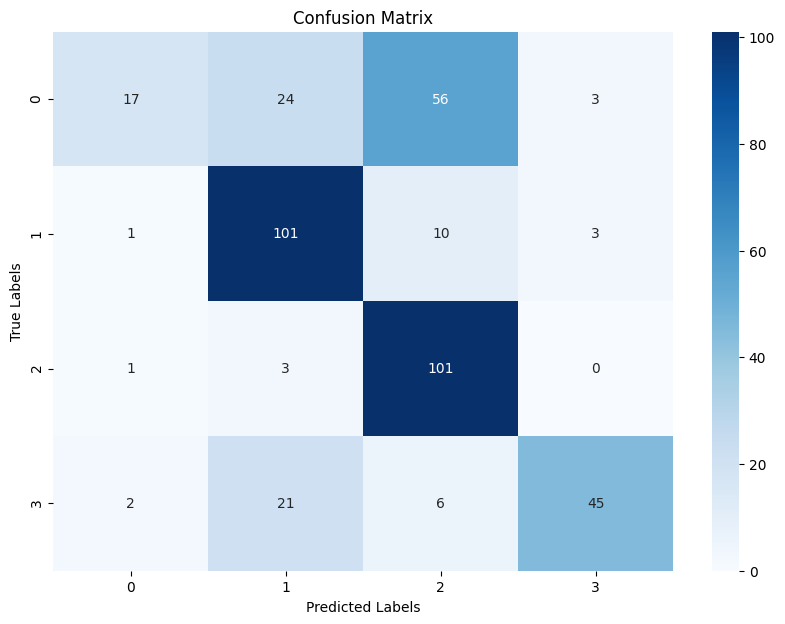

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.17      0.28       100
           1       0.68      0.88      0.77       115
           2       0.58      0.96      0.73       105
           3       0.88      0.61      0.72        74

    accuracy                           0.67       394
   macro avg       0.74      0.65      0.62       394
weighted avg       0.72      0.67      0.62       394



In [39]:

y_pred_proba = model.predict(x_test)  
y_pred = np.argmax(y_pred_proba, axis=1)  

if len(y_test.shape) > 1:  
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# 3. Créer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# 4. Visualiser la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(np.unique(y_true))), yticklabels=range(len(np.unique(y_true))))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 5. Afficher un rapport détaillé
print("Classification Report:")
print(classification_report(y_true, y_pred))


In [1]:
from sklearn.preprocessing import label_binarize

# Convertir y_true en format one-hot
n_classes = y_pred_proba.shape[1]
y_true_onehot = label_binarize(y_true, classes=list(range(n_classes)))

# Tracer une courbe ROC pour chaque classe
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_onehot[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (area = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class")
plt.legend(loc="lower right")
plt.show()


NameError: name 'y_pred_proba' is not defined

In [34]:
base_dir = os.getcwd()
save_dir = os.path.join(base_dir,'..', 'src', 'models', 'sauvegardes_modeles')  # Remonter d'un niveau, aller dans 'src/models'
model_to_load = 'modele_brain_tumor_20241125_002219.h5'  # Remplace par le nom exact de ton modèle
model_path = os.path.join(save_dir, model_to_load)

model = load_model(model_path)

13/13 [==============================] - 38s 3s/step


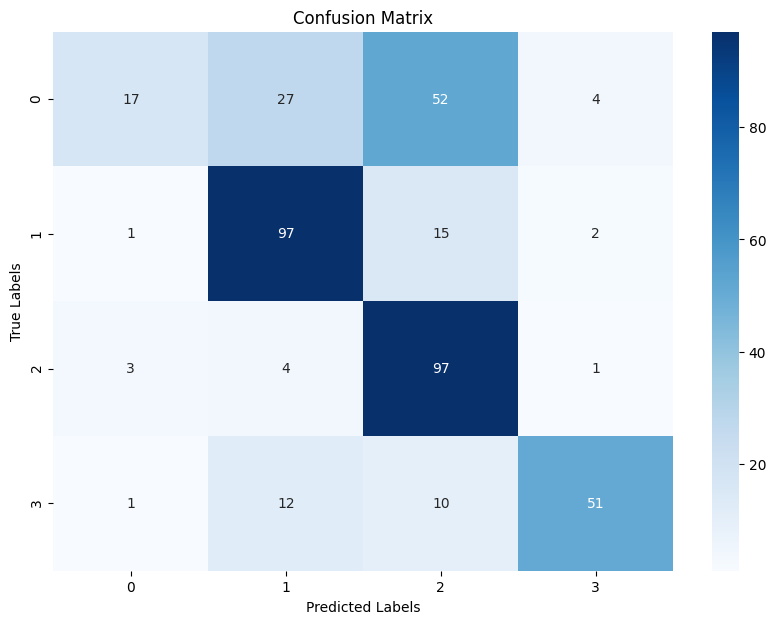

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.17      0.28       100
           1       0.69      0.84      0.76       115
           2       0.56      0.92      0.70       105
           3       0.88      0.69      0.77        74

    accuracy                           0.66       394
   macro avg       0.73      0.66      0.63       394
weighted avg       0.71      0.66      0.62       394



In [32]:

y_pred_proba = model.predict(x_test)  
y_pred = np.argmax(y_pred_proba, axis=1)  

if len(y_test.shape) > 1:  
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# 3. Créer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# 4. Visualiser la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(np.unique(y_true))), yticklabels=range(len(np.unique(y_true))))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 5. Afficher un rapport détaillé
print("Classification Report:")
print(classification_report(y_true, y_pred))


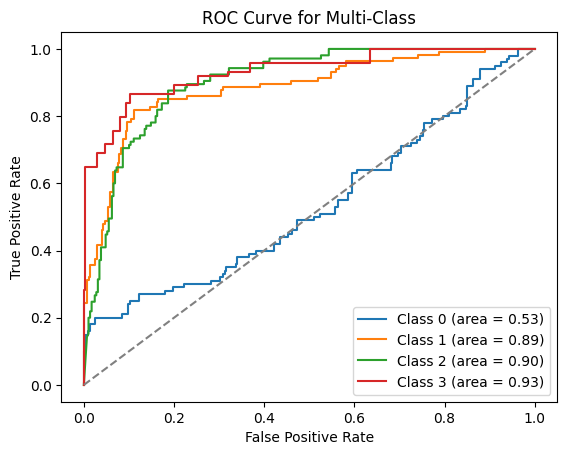

In [37]:
from sklearn.preprocessing import label_binarize

# Convertir y_true en format one-hot
n_classes = y_pred_proba.shape[1]
y_true_onehot = label_binarize(y_true, classes=list(range(n_classes)))

# Tracer une courbe ROC pour chaque classe
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_onehot[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (area = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class")
plt.legend(loc="lower right")
plt.show()



# Analyse de la Courbe ROC pour un problème Multi-Classes

Ce graphique montre les **courbes ROC (Receiver Operating Characteristic)** pour un problème de classification multi-classes avec 4 classes. Chaque ligne colorée représente la performance du modèle pour distinguer une classe donnée des autres ("un contre tous").

---

## 1. Axes du graphique
- **Axe des X : False Positive Rate (FPR)**  
  Le taux de faux positifs, qui mesure la proportion de négatifs mal classés comme positifs. Un FPR élevé signifie que le modèle commet de nombreuses erreurs en classant les négatifs.

- **Axe des Y : True Positive Rate (TPR)**  
  Le taux de vrais positifs, qui mesure la proportion de positifs correctement classés. Un TPR élevé signifie que le modèle identifie correctement les vrais positifs.

---

## 2. Lignes colorées
Chaque courbe représente une classe particulière. Voici les performances du modèle pour chaque classe :

- **Classe 0 (bleu)**  
  - AUC = 0.53 : Le modèle est peu performant pour différencier cette classe des autres, proche d'un modèle aléatoire.

- **Classe 1 (orange)**  
  - AUC = 0.89 : Le modèle est performant pour cette classe, avec une bonne capacité de distinction.

- **Classe 2 (vert)**  
  - AUC = 0.90 : Très similaire à la Classe 1, le modèle est performant.

- **Classe 3 (rouge)**  
  - AUC = 0.93 : C'est la classe où le modèle est le plus performant, avec une excellente distinction des exemples positifs pour cette classe.

---

## 3. La ligne grise en pointillés
La ligne diagonale représente un modèle totalement aléatoire (AUC = 0.5). Une courbe ROC proche de cette ligne indique que le modèle ne fait pas mieux que deviner au hasard.

---

## 4. Interprétation des AUC (Aire sous la courbe)
- **AUC proche de 1.0 :** Performance excellente (Classe 3 et Classe 2 ici).
- **AUC entre 0.7 et 0.9 :** Bonne performance (Classe 1).
- **AUC proche de 0.5 :** Performance faible ou aléatoire (Classe 0).

---

## 5. Conclusion générale
- Le modèle est performant pour les classes **1, 2 et 3**, avec des AUC respectivement de **0.89, 0.90, et 0.93**.
- Cependant, il est beaucoup moins performant pour la classe **0** (AUC = 0.53). Cela peut indiquer :
  - Un déséquilibre dans les données,
  - Une confusion entre les classes,
  - Une complexité plus grande pour prédire cette classe.

---

## Solutions possibles pour améliorer la performance
- **Rééquilibrer les données :** Ajouter plus d'exemples pour la classe 0 si elle est sous-représentée.
- **Ajuster l'architecture ou les hyperparamètres du modèle :** Par exemple, en modifiant la fonction de perte ou en ajoutant des couches.
- **Analyser les caractéristiques de la classe 0 :** Vérifier s'il y a des patterns spécifiques ou des anomalies dans les données.

---




Quand utiliser One-vs-One ?
L'approche One-vs-One peut être utile si tu veux comparer chaque paire de classes individuellement. Cela peut être intéressant si :

Tu veux analyser si le modèle confond des tumeurs spécifiques entre elles (par exemple, "glioblastome" vs "métastase").
Ton jeu de données est équilibré entre les classes.
Cependant, One-vs-One produit beaucoup de courbes ROC (une pour chaque paire de classes), ce qui peut être plus complexe à analyser pour un projet avec plusieurs classes.